## 1. Introduction to Baby Names Data

In this project, we will explore a rich dataset of first names of babies born in the US, that spans a period of more than 100 years! This suprisingly simple dataset can help us uncover so many interesting stories, and that is exactly what we are going to be doing.

Let us start by reading the data.

In [1]:
# Import modules
import pandas as pd

# Read names into a dataframe: bnames
bnames = pd.read_csv('datasets/bnames.csv')

bnames.head()

,id,name,year,sex,births
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


## 2. Exploring Trends in Names

One of the first things we want to do is to understand naming trends. Let us start by figuring out the top five most popular male and female names for this decade (born 2011 and later).

In [2]:
# bnames_top5: A dataframe with top 5 popular male and female names for the decade
import numpy as np

# Filter data from 2011 and later
# use loc[] to slice through the bnames
bnames_2011 = bnames.loc[bnames['year'] > 2010]
print(bnames_2011.head())

# Compute number of births for these data grouping by sex and name
bnames_2011_agg = bnames_2011.groupby(['sex', 'name'], as_index=False)['births'].sum()
print(bnames_2011_agg.head())

# Sort theses values by name: Female before Male (ascending) and number of births (descending)
bnames_2011_sort = bnames_2011_agg.sort_values(['sex','births'], ascending=[True,False])
print(bnames_2011_sort.head())

# Get top 5 of sorted DataFrame group
# .head(): get the top5 for each F/M group
bnames_2011_top5 = bnames_2011_sort.groupby('sex').head().reset_index(drop=True)
bnames_2011_top5

              id      name  year sex  births
1691633  1691634    Sophia  2011   F   21816
1691634  1691635  Isabella  2011   F   19870
1691635  1691636      Emma  2011   F   18777
1691636  1691637    Olivia  2011   F   17294
1691637  1691638       Ava  2011   F   15480
  sex       name  births
0   F      Aabha      21
1   F  Aabriella       5
2   F    Aadhira      29
3   F     Aadhya     583
4   F       Aadi      11
      sex      name  births
24147   F    Sophia   83720
8501    F      Emma   81354
10730   F  Isabella   73451
20713   F    Olivia   72611
3761    F       Ava   61789


,sex,name,births
0,F,Sophia,83720
1,F,Emma,81354
2,F,Isabella,73451
3,F,Olivia,72611
4,F,Ava,61789
5,M,Jacob,74145
6,M,Mason,73176
7,M,Noah,71463
8,M,William,67415
9,M,Liam,66631


## 3. Proportion of Births

While the number of births is a useful metric, making comparisons across years becomes difficult, as one would have to control for population effects. One way around this is to normalize the number of births by the total number of births in that year.

In [3]:
# Objective: Compute the proportion of births by year and add it as a new column

bnames2 = bnames.copy()

# Compute the total number of births in a year
total_births_by_year = bnames.groupby(['year'])['births'].transform(sum)
print(total_births_by_year.head())

# Add a new column named 'prop_births' representing the proportion of births 
# by dividing births by the total number of births in a year.
bnames2['prop_births'] = bnames2['births']/total_births_by_year
bnames2.head()

0    201484
1    201484
2    201484
3    201484
4    201484
Name: births, dtype: int64


,id,name,year,sex,births,prop_births
0,1,Mary,1880,F,7065,0.035065
1,2,Anna,1880,F,2604,0.012924
2,3,Emma,1880,F,2003,0.009941
3,4,Elizabeth,1880,F,1939,0.009624
4,5,Minnie,1880,F,1746,0.008666


## 4. Popularity of Names

Now that we have the proportion of births, let us plot the popularity of a name through the years. How about plotting the popularity of the female names Elizabeth, and Deneen, and inspecting the underlying trends for any interesting patterns!

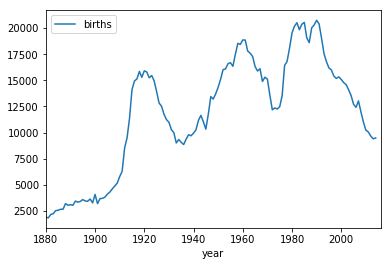

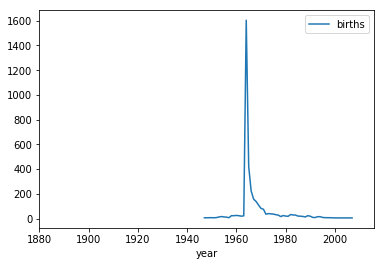

In [7]:
# Set up matplotlib for plotting in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt

# Write a function to plot the trends, so that we can keep our code DRY (Don't Repeat Yourself)
# Function takes two arguments: name,sex
# plots the trend in number of births by year.
def plot_trends(name, sex):
    # Get the data by name and sex
    data = bnames[(bnames.name == name) & (bnames.sex == sex)]
    # Plot the trend
    ax = data.plot(x = 'year', y = 'births')
    # Set x axis limited within [1880, 2016]
    ax.set_xlim(1880, 2016)
    return ax

# Plot trends for Elizabeth and Deneen
for name in ['Elizabeth', 'Deneen']:
    plot_trends(name, 'F')

# How many times did these female names peak?
# num_peaks_elizabeth = ...
# num_peaks_deneen    = ...
# import peakutils
# indexes = 1880 + peakutils.indexes(y, thres=0.875, min_dist=1)

## 5. Trendy vs. Stable Names

Based on the plots we created earlier, we can see that Elizabeth is a fairly stable name, while Deneen is not. An interesting question to ask would be what are the top 5 stable and top 5 trendiest names. A stable name is one whose proportion across years does not vary drastically, while a trendy name is one whose popularity peaks for a short period and then dies down.

There are many ways to measure trendiness. A simple measure would be to look at the maximum proportion of births for a name, normalized by the sume of proportion of births across years. For example, if the name Joe had the proportions 0.1, 0.2, 0.1, 0.1, then the trendiness measure would be 0.2/(0.1 + 0.2 + 0.1 + 0.1) which equals 0.5.

Let us use this idea to figure out the top 10 trendy names in this data set, with at least a 1000 births.

In [8]:
# Objective: Create a new DataFrame named top10_trendy_names 
# that consists of the top 10 trendy names in the dataset with at least a 1000 births. 

names = pd.DataFrame()

name_and_sex_grouped = bnames.groupby(['name', 'sex'])

# 'total' column: represent total number of births across all years.
names['total'] = name_and_sex_grouped['births'].sum()

# 'max' column: represent the maximum number of births in a year, across all years. 
names['max'] = bnames2.groupby(['name', 'sex'])['births'].max()

# 'trendiness': computed as the max divided by the total. 
names['trendiness'] = names['max']/names['total']

# filtre names with at least a 1000 births, sort by trendiness
top10_trendy_names = names.loc[names['total'] > 1000].sort_values('trendiness', ascending=False).\
                    head(10).reset_index()
top10_trendy_names

,name,sex,total,max,trendiness
0,Christop,M,1082,1082,1.000000
1,Daleyza,F,1988,1461,0.734909
2,Everly,F,3643,1854,0.508921
3,Kizzy,F,2312,1116,0.482699
4,Jayceon,M,4385,2006,0.457469
5,Deneen,F,3603,1604,0.445185
6,Aranza,F,1120,473,0.422321
7,Marely,F,2436,1004,0.412151
8,Kanye,M,1261,507,0.402062
9,Moesha,F,1067,426,0.399250


## 6. Bring in Mortality Data

So, what more is in a name? Well, with some further work, it is possible to predict the age of a person based on the name. For this, we will need actuarial data that can tell us the chances that someone is still alive, based on when they were born. Fortunately, the [SSA](https://www.ssa.gov) provides detailed actuarial life tables by [birth cohorts](https://www.ssa.gov/oact/STATS/table4c6.html).

You can read the [documentation](https://www.ssa.gov/oact/NOTES/as120/LifeTables_Body.html) for the lifetables to understand what the different columns mean. The key column of interest to us is lx, which provides the number of people born in a year who live upto a given age. The probability of being alive can be derived as lx by 100,000.

Given that 2016 is the latest year in the baby names dataset, we are interested only in a subset of this data, that will help us answer the question, "What percentage of people born in Year X are still alive in 2016?"

Let us use this data and plot it to get a sense of the mortality distribution!

   year  age       qx    lx   dx    Lx    Tx    ex sex
0  1900  116  0.83363     0    0     0     0  0.69   M
1  1900  116  0.83363     0    0     0     0  0.69   F
2  1910  106  0.51178     7    3     5     9  1.38   M
3  1910  106  0.47062    61   29    47    92  1.52   F
4  1920   96  0.30765  1625  500  1375  4000  2.46   M


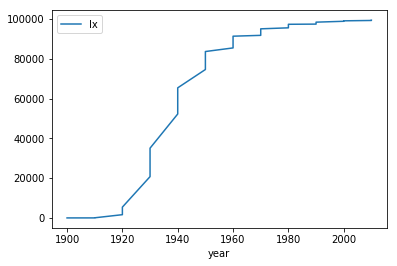

In [10]:
# Read lifetables from datasets/lifetables.csv relevant to those alive in 2016
lifetables_2016 = pd.read_csv('datasets/lifetables.csv')
print(lifetables_2016.head())

# Plot the mortality distribution: year vs. lx
lifetables_2016.plot(x='year', y='lx')

## 7. Smoothen the Curve!

We are almost there. There is just one small glitch. The cohort life tables are provided only for every decade. In order to figure out the distribution of people alive, we need the probabilities for every year. One way to fill up the gaps in the data is to use some kind of interpolation. Let us keep things simple and use linear interpolation to fill out the gaps in values of lx, between the years 1900 and 2016.

,year,lx,sex
0,1900,0.0,F
1,1901,6.1,F
2,1902,12.2,F
3,1903,18.3,F
4,1904,24.4,F


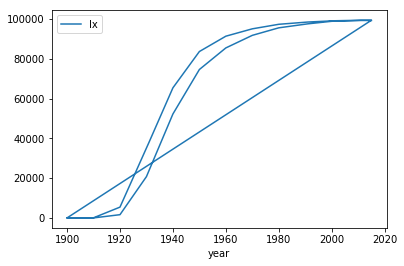

In [20]:
# Create smoothened lifetable_2016_s by interpolating values of lx

# lifetable_2016_s from lifetables_2016 that consists of years from 1900 to 2010.
year = np.arange(1900, 2016)

# Seperate two dataframe for 2 sexes: F and M
mf = {'M': pd.DataFrame(), 'F': pd.DataFrame()}

# Linearly interpolate values of lx, where they are missing. 
for sex in ['M', 'F']:
    d = lifetables_2016[lifetables_2016['sex']==sex][['year', 'lx']]
    # Interpolate the value to smooth data
    mf[sex] = d.set_index('year').reindex(year).interpolate().reset_index()
    mf[sex]['sex'] = sex

# Concatenate two seperated DataFrame for F and M into one
lifetable_2016_s = pd.concat(mf, ignore_index = True)

lifetable_2016_s.plot(x='year', y='lx')
lifetable_2016_s.head()

## 8. Distribution of People Alive by Name

Now that we have all the required data, we need a few helper functions to help us with our analysis.

The first function we will write is get_data,which takes name and sex as inputs and returns a data frame with the distribution of number of births and number of people alive by year.

The second function is plot_name which accepts the same arguments as get_data, but returns a line plot of the distribution of number of births, overlaid by an area plot of the number alive by year.

Using these functions, we will plot the distribution of births for boys named Joseph and girls named Brittany.

      id    name  year sex  births   lx   n_alive
0  54497  Joseph  1900   M    3714  0.0  0.000000
1  57945  Joseph  1901   M    2766  0.7  0.019362
2  61198  Joseph  1902   M    3098  1.4  0.043372
3  64600  Joseph  1903   M    3121  2.1  0.065541
4  68073  Joseph  1904   M    3291  2.8  0.092148


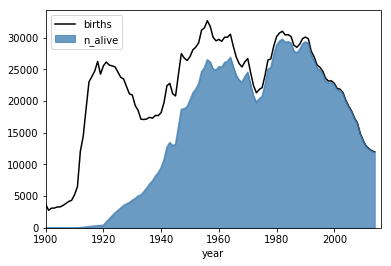

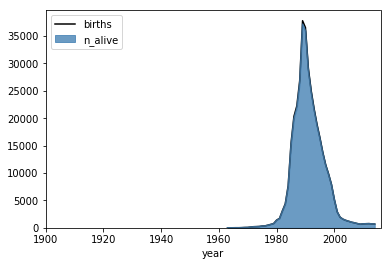

In [22]:
# Take name and sex as inputs
# Return a dataframe with the distribution
# of number of births and numbers of people alive by year
# consist of the number of births (births)
# and number of people alive (n_alive) by year, for each name
def get_data(name, sex):
    name_sex = ((bnames['name'] == name) & (bnames['sex'] == sex))
    # Merge the lifetable_2016_s with bnames
    data = bnames[name_sex].merge(lifetable_2016_s)
    # Compute the number of people alive
    data['n_alive'] = data['lx']/(10**5)*data['births']
    return data

# The values for lx and n_alive might vary from the values shown above
# depending on how you interpolated your lifetables. 
print(get_data('Joseph', 'M').head())

# Plot the data frame to display the distribution of births and number living. 

def plot_data(name, sex):
    fig, ax = plt.subplots()
    dat = get_data(name, sex)
    dat.plot(x = 'year', y = 'births', ax = ax, color = 'black')
    dat.plot(x = 'year', y = 'n_alive', kind='area', ax = ax, color = 'steelblue', alpha = 0.8)
    ax.set_xlim(1900,2016)
    
# Plot the distribution of births and number alive for Joseph and Brittany
plot_data('Joseph', 'M')
plot_data('Brittany', 'F')

## 9. Estimate Age

In this section, we want to figure out the probability that a person with a certain name is alive, as well as the quantiles of their age distribution. In particular, we will estimate the age of a female named Gertrude. Any guesses on how old a person with this name is? How about a male named William?

In [25]:
# Import modules
from wquantiles import quantile

# Function to estimate age quantiles
# It should return a pd.Series object with 
# the indices name, p_alive (probability of being alive), q25, q50 and q75 (age quantiles). 
def estimate_age(name, sex):
    data = get_data(name, sex)
    # Type of age quantiles: q75, q50, q25
    qs = [0.75, 0.5, 0.25]
    # Compute the quantiles
    quantiles = [2016 - int(quantile(data.year, data.n_alive, q)) for q in qs]
    # Get the dictionary: key = q25,50,75, values=quantiles
    result = dict(zip(['q25', 'q50', 'q75'], quantiles))
    # Compute the probability of being alive
    # Round the values .00
    result['p_alive'] = round(data.n_alive.sum()/data.births.sum()*100, 2)
    result['sex'] = sex
    result['name'] = name
    return pd.Series(result)

# Estimate the age of Gertrude
estimate_age('Gertrude', 'F')

name       Gertrude
p_alive       18.71
q25              70
q50              80
q75              89
sex               F
dtype: object

## 10. Median Age of Top 10 Female Names

In the previous section, we estimated the age of a female named Gertrude. Let's go one step further this time, and compute the 25th, 50th and 75th percentiles of age, and the probability of being alive for the top 10 most common female names of all time. This should give us some interesting insights on how these names stack up in terms of median ages!

In [27]:
# Create median_ages: DataFrame with Top 10 Female names, 
#    age percentiles and probability of being alive

# Extract the top 10 female names of all time from the bnames dataset. 
top_10_female_names = bnames.groupby(['name', 'sex'], as_index = False).\
                    agg({'births': np.sum}).sort_values('births', ascending = False).\
                    query('sex == "F"').head(10).reset_index(drop = True)

# Use the estimate_age function on each of the 10 names to create a DataFrame named median_ages
estimates = pd.concat([estimate_age(name, 'F') for name in top_10_female_names.name], axis = 1)
median_ages = estimates.T.sort_values('q50').reset_index(drop = True)
median_ages

,name,p_alive,q25,q50,q75,sex
0,Sarah,85.99,21,30,38,F
1,Jennifer,96.35,31,38,44,F
2,Elizabeth,74.33,24,39,58,F
3,Susan,85.8,52,59,65,F
4,Patricia,76.75,54,63,71,F
5,Mary,54.38,54,64,74,F
6,Linda,83.43,57,64,69,F
7,Margaret,49.38,51,64,75,F
8,Barbara,70.6,58,66,74,F
9,Dorothy,35.79,64,75,85,F


Reference: https://projects.datacamp.com/projects/5